# Carbon Investment Widget (mock-up)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
carbon_data = pd.read_csv('../../datasets/carbon_investment.csv')
metadata_carbon = {'ISO':carbon_data.columns[0] , 'Country':carbon_data.columns[1], 'Carbon_5_txt':carbon_data.columns[2], 'Carbon_5_area':carbon_data.columns[3],
                    'Carbon_10_txt':carbon_data.columns[4], 'Carbon_10_area':carbon_data.columns[5],'Diff_carbon_5_10':carbon_data.columns[6], 'Protected_area':carbon_data.columns[7], 'Remaining_area':carbon_data.columns[8]}
carbon_data.columns = ['ISO', 'Country', 'Carbon_5_txt', 'Carbon_5_area', 'Carbon_10_txt', 'Carbon_10_area','Diff_carbon_5_10','Protected_area', 'Remaining_area']
carbon_data['Carbon_5_area'] = carbon_data['Carbon_5_area'].str.replace(',', '').astype(np.float64)
carbon_data['Carbon_10_area'] = carbon_data['Carbon_10_area'].str.replace(',', '').astype(np.float64)
carbon_data['Remaining_area'] = carbon_data['Remaining_area'].str.replace(',', '').astype(np.float64)
#carbon_data.set_index('ISO', inplace = True)
carbon_data

,ISO,Country,Carbon_5_txt,Carbon_5_area,Carbon_10_txt,Carbon_10_area,Diff_carbon_5_10,Protected_area,Remaining_area
0,AGO,Angola,900 (±100),900.0,"1,300 (± 100)",1300.0,400,168.7598,35058.97
1,ATG,Antigua & Barbuda,0.00,0.0,0.00,0.0,0,444.4700,445.21
2,AUS,Australia,0.00,0.0,0.00,0.0,0,484299.6015,482962.98
3,BHR,Bahrain,0.00,0.0,0.00,0.0,0,0.0000,82.03
4,BGD,Bangladesh,"98,900 (±2,800)",98900.0,"113,700 (± 3,200)",113700.0,14800,375201.7996,0.00
...,...,...,...,...,...,...,...,...,...
96,VUT,Vanuatu,0,0.0,0,0.0,0,0.0000,1769.02
97,VEN,Venezuela,"3,000 (±700)",3000.0,"8,400 (± 2,000)",8400.0,5400,185790.9775,85414.87
98,VNM,Vietnam,"75,900 (±3,200)",75900.0,"90,900 (± 3,800)",90900.0,15000,73507.8649,0.00
99,VGB,"Virgin Islands, British",0,0.0,0,0.0,0,0.0000,87.21


In [21]:
carbon_data.dtypes

ISO                  object
Country              object
Carbon_5_txt         object
Carbon_5_area       float64
Carbon_10_txt        object
Carbon_10_area      float64
Diff_carbon_5_10      int64
Protected_area      float64
Remaining_area      float64
dtype: object

In [22]:
ind_data = carbon_data[carbon_data['Country'] == 'Indonesia'].copy()
ind_data

,ISO,Country,Carbon_5_txt,Carbon_5_area,Carbon_10_txt,Carbon_10_area,Diff_carbon_5_10,Protected_area,Remaining_area
40,IDN,Indonesia,"325,400 (±21,100)",325400.0,"427,600 (± 27,700)",427600.0,102200,657439.3765,1565772.55


In [26]:
plot_data = ind_data.drop(columns = ['ISO','Country', 'Carbon_5_txt', 'Carbon_10_txt', 'Diff_carbon_5_10']).T
plot_data.columns = ['area']
plot_data

,area
Carbon_5_area,3.254000e+05
Carbon_10_area,4.276000e+05
Protected_area,6.574394e+05
Remaining_area,1.565773e+06


Indonesia: Extent of investible blue carbon (ha) is 325,400 (±21,100) (at $5/ton)




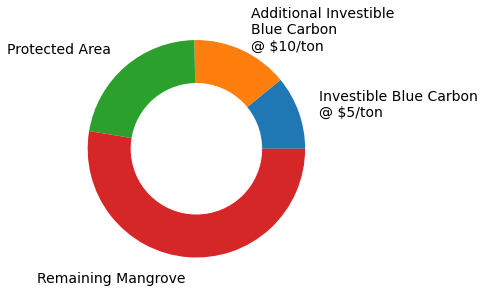

In [56]:
print(f'{ind_data.iloc[0,1]}: Extent of investible blue carbon (ha) is {ind_data.iloc[0,2]} (at $5/ton)\n\n')

plt.rcParams['figure.figsize'] = [5, 5]
labs = ['Investible Blue Carbon\n@ $5/ton', 'Additional Investible\nBlue Carbon\n@ $10/ton', 'Protected Area',  'Remaining Mangrove']

# Create a pieplot
plt.pie(plot_data['area'], labels=labs, labeldistance=1.2, textprops={'fontsize' : 14})
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()